# Automating Port Operations
      Submitted by: Vrinda Pillai

## CNN Model

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving boat_type_classification_dataset.zip to boat_type_classification_dataset.zip


In [ ]:
import zipfile

In [ ]:
with zipfile.ZipFile("boat_type_classification_dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("boat_dataset")

In [ ]:
dataset_path = "/content/boat_dataset/boat_type_classification_dataset"

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# ✅ Correct dataset root path
dataset_path = "/content/boat_dataset/boat_type_classification_dataset"
split_base = "/content/split_boat_dataset"
train_dir = os.path.join(split_base, "train")
test_dir = os.path.join(split_base, "test")

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif')

for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if not os.path.isdir(class_path):
        continue

    # Filter only image files
    image_files = [
        f for f in os.listdir(class_path)
        if os.path.isfile(os.path.join(class_path, f)) and f.lower().endswith(image_extensions)
    ]

    # Skip empty classes
    if len(image_files) == 0:
        print(f"⚠️ Skipping '{class_name}' — no images found.")
        continue

    # Split into train/test
    train_imgs, test_imgs = train_test_split(image_files, test_size=0.2, random_state=43)

    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

    for img in train_imgs:
        shutil.copy(os.path.join(class_path, img), os.path.join(train_dir, class_name, img))

    for img in test_imgs:
        shutil.copy(os.path.join(class_path, img), os.path.join(test_dir, class_name, img))

    print(f"✅ Processed '{class_name}' — total: {len(image_files)}, train: {len(train_imgs)}, test: {len(test_imgs)}")

✅ Processed 'paper_boat' — total: 31, train: 24, test: 7
✅ Processed 'gondola' — total: 193, train: 154, test: 39
✅ Processed 'ferry_boat' — total: 63, train: 50, test: 13
✅ Processed 'kayak' — total: 203, train: 162, test: 41
✅ Processed 'inflatable_boat' — total: 16, train: 12, test: 4
✅ Processed 'sailboat' — total: 389, train: 311, test: 78
✅ Processed 'freight_boat' — total: 23, train: 18, test: 5
✅ Processed 'cruise_ship' — total: 191, train: 152, test: 39
✅ Processed 'buoy' — total: 53, train: 42, test: 11


In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_dataset = image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=43,
    shuffle=True,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

val_dataset = image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=43,
    shuffle=True,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

Found 925 files belonging to 9 classes.
Using 740 files for training.
Found 925 files belonging to 9 classes.
Using 185 files for validation.


In [ ]:
test_dataset = image_dataset_from_directory(
    test_dir,
    shuffle=False,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)


Found 237 files belonging to 9 classes.


In [ ]:
train_dataset = train_dataset.map(lambda x, y: (x / 255.0, y))
val_dataset = val_dataset.map(lambda x, y: (x / 255.0, y))
test_dataset = test_dataset.map(lambda x, y: (x / 255.0, y))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense

model = Sequential([
    # 1st Conv Layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(),

    # 2nd Conv Layer
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(),

    # Global Average Pooling
    GlobalAveragePooling2D(),

    # Dense layers
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),

    # Output layer (9 classes → softmax)
    Dense(9, activation='softmax')
])

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall

model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)

In [ ]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20
)

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 296ms/step - accuracy: 0.3118 - loss: 2.0166 - precision: 0.4099 - recall: 0.0185 - val_accuracy: 0.3946 - val_loss: 1.7267 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - accuracy: 0.3298 - loss: 1.8277 - precision: 0.3600 - recall: 0.0021 - val_accuracy: 0.3946 - val_loss: 1.7095 - val_precision: 1.0000 - val_recall: 0.0054
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 185ms/step - accuracy: 0.3212 - loss: 1.8166 - precision: 0.5440 - recall: 0.0128 - val_accuracy: 0.3946 - val_loss: 1.7153 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - accuracy: 0.3160 - loss: 1.7964 - precision: 0.5367 - recall: 0.0073 - val_accuracy: 0.3946 - val_loss: 1.7222 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - accuracy: 0.3351 - loss: 1.7959 - precision: 0.2095 - recall: 0.0029 - val_accura

Observations:
Low Accuracy (< 50%) → Model is not yet generalizing well.

High Precision, but Very Low Recall → Model is good at avoiding false positives, but it's missing a lot of correct cases (false negatives).

Overfitting not obvious yet → Validation loss is similar to training loss.

In [ ]:
# Evaluate
test_loss, test_acc, test_prec, test_rec = model.evaluate(test_dataset)

# Print results
print(f"\n🧪 Test Evaluation:")
print(f"Test Loss     : {test_loss:.4f}")
print(f"Test Accuracy : {test_acc:.4f}")
print(f"Test Precision: {test_prec:.4f}")
print(f"Test Recall   : {test_rec:.4f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 316ms/step - accuracy: 0.2610 - loss: 1.8506 - precision: 0.3956 - recall: 0.0479

🧪 Test Evaluation:
Test Loss     : 1.6540
Test Accuracy : 0.3755
Test Precision: 0.5429
Test Recall   : 0.0802


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step


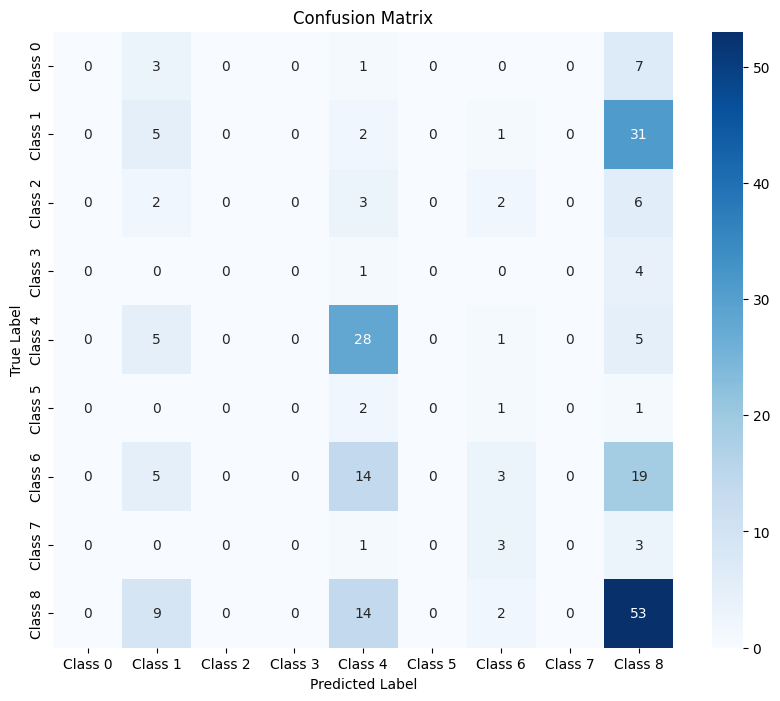


📊 Classification Report:

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00        11
     Class 1       0.17      0.13      0.15        39
     Class 2       0.00      0.00      0.00        13
     Class 3       0.00      0.00      0.00         5
     Class 4       0.42      0.72      0.53        39
     Class 5       0.00      0.00      0.00         4
     Class 6       0.23      0.07      0.11        41
     Class 7       0.00      0.00      0.00         7
     Class 8       0.41      0.68      0.51        78

    accuracy                           0.38       237
   macro avg       0.14      0.18      0.14       237
weighted avg       0.27      0.38      0.30       237



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Get true labels and predicted labels
y_true = np.concatenate([y.numpy() for _, y in test_dataset])  # shape: (num_samples, 9)
y_pred_probs = model.predict(test_dataset)                     # shape: (num_samples, 9)

# Convert one-hot → class index
y_true_labels = np.argmax(y_true, axis=1)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
# Get class names
class_names = test_dataset.class_names if hasattr(test_dataset, 'class_names') else [f"Class {i}" for i in range(9)]

# Confusion Matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
# Classification Report
print("\n📊 Classification Report:\n")
print(classification_report(y_true_labels, y_pred_labels, target_names=class_names))

In [ ]:
import numpy as np
from collections import Counter

label_counts = Counter(np.argmax(np.concatenate([y.numpy() for _, y in train_dataset]), axis=1))
print("Class distribution in training set:", label_counts)

Class distribution in training set: Counter({np.int64(8): 238, np.int64(6): 135, np.int64(4): 123, np.int64(1): 121, np.int64(2): 40, np.int64(0): 35, np.int64(7): 21, np.int64(3): 16, np.int64(5): 11})


Accuracy	38% — quite low
Precision/Recall	Low for most classes except 4 and 8
Class Imbalance	Very likely — large difference in support
Many Classes	Have zero precision/recall (model didn’t learn them at all)

Model heavily favors class 4 and 8 (possible data imbalance or easier patterns)

Other classes are under-represented or under-learned

The model is likely biased toward dominant or easier classes

huge variation (e.g., Class 0,7,3,5 has very low samples and class 2has medium, class 8 is dominant)

##  Using MobileNetV2


In [ ]:
import os
import random
import shutil
from pathlib import Path

# Source folder: your full dataset with subfolders for each class
SOURCE_DIR = "/content/boat_dataset/boat_type_classification_dataset"
DEST_DIR = "/content/boat_dataset_split"  # new folder with /train and /test

train_ratio = 0.7
random.seed(1)  # For reproducibility

# Create train and test directories
for split in ['train', 'test']:
    split_path = os.path.join(DEST_DIR, split)
    os.makedirs(split_path, exist_ok=True)

# Go through each class folder
for class_name in os.listdir(SOURCE_DIR):
    class_path = os.path.join(SOURCE_DIR, class_name)
    if not os.path.isdir(class_path):
        continue

    # Get image list and shuffle
    images = os.listdir(class_path)
    random.shuffle(images)

    # Calculate split index
    split_index = int(train_ratio * len(images))
    train_images = images[:split_index]
    test_images = images[split_index:]

    # Prepare destination folders
    train_class_dir = os.path.join(DEST_DIR, 'train', class_name)
    test_class_dir = os.path.join(DEST_DIR, 'test', class_name)
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True)

    # Copy files
    for img in train_images:
        shutil.copy2(os.path.join(class_path, img), os.path.join(train_class_dir, img))
    for img in test_images:
        shutil.copy2(os.path.join(class_path, img), os.path.join(test_class_dir, img))

print("✅ Dataset split complete: 70% train, 30% test.")

✅ Dataset split complete: 70% train, 30% test.


In [ ]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Load train dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/boat_dataset_split/train',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=1,
    label_mode='categorical'  # Important for categorical_crossentropy
)

# Load test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/boat_dataset_split/test',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=1,
    label_mode='categorical'
)

# Normalize the images (image_scale = 1./255)
def normalize(ds):
    return ds.map(lambda x, y: (x / 255.0, y)).cache().prefetch(buffer_size=tf.data.AUTOTUNE)

train_ds = normalize(train_ds)
test_ds = normalize(test_ds)

# Create a validation dataset from training data (e.g., 20%)
val_ds = train_ds.take(int(0.2 * len(train_ds)))
train_ds = train_ds.skip(int(0.2 * len(train_ds)))

Found 811 files belonging to 9 classes.
Found 351 files belonging to 9 classes.


Build MobilenetV2 lightweight model

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization

# Load MobileNetV2 base (without top layers)
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze for transfer learning

# Build model on top
inputs = Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.1)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.1)(x)
outputs = Dense(9, activation='softmax')(x)

model = Model(inputs, outputs)
model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,621,513 (10.00 MB)

 Trainable params: 362,761 (1.38 MB)

 Non-trainable params: 2,258,752 (8.62 MB)

Compile the Model

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall

model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)

Train the Model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[early_stop]
)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 25s 554ms/step - accuracy: 0.4217 - loss: 1.9043 - precision: 0.6121 - recall: 0.3044 - val_accuracy: 0.7875 - val_loss: 0.8282 - val_precision: 0.9065 - val_recall: 0.6062
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8439 - loss: 0.4335 - precision: 0.9179 - recall: 0.7839 - val_accuracy: 0.8188 - val_loss: 0.6107 - val_precision: 0.9219 - val_recall: 0.7375
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9037 - loss: 0.2858 - precision: 0.9397 - recall: 0.8790 - val_accuracy: 0.8625 - val_loss: 0.5316 - val_precision: 0.9323 - val_recall: 0.7750
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9514 - loss: 0.1919 - precision: 0.9739 - recall: 0.9292 - val_accuracy: 0.8625 - val_loss: 0.4609 - val_precision: 0.9184 - val_recall: 0.8438
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9807 - loss: 0.1153 - precision: 0.9948 - recall: 0.9698 - val_accuracy: 0.8938 - val_loss: 0.423

In [ ]:
test_loss, test_acc, test_prec, test_rec = model.evaluate(test_ds)

print(f"\n📊 Test Evaluation:")
print(f"Loss     : {test_loss:.4f}")
print(f"Accuracy : {test_acc:.4f}")
print(f"Precision: {test_prec:.4f}")
print(f"Recall   : {test_rec:.4f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 502ms/step - accuracy: 0.7933 - loss: 0.6432 - precision: 0.8297 - recall: 0.7615

📊 Test Evaluation:
Loss     : 0.5864
Accuracy : 0.8205
Precision: 0.8532
Recall   : 0.7949


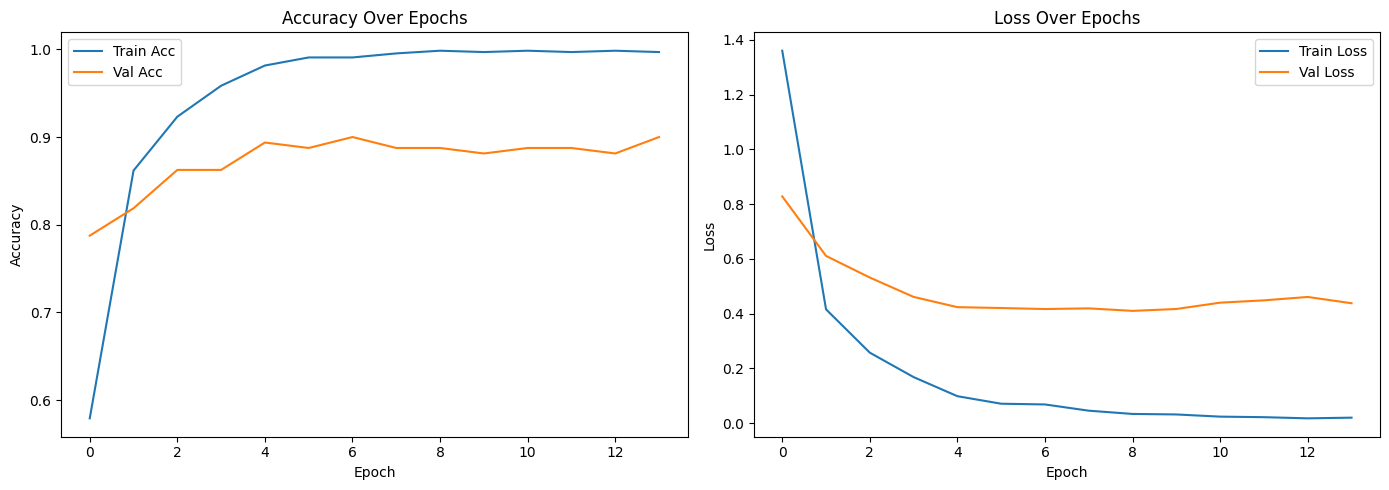

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Training Accuracy vs Validation Accuracy
Training Accuracy: Climbs to ~99.9%, showing the model has learned the training data very well.

Validation Accuracy: Stabilizes around 90%, which is excellent.

Slight gap → minor overfitting, but it’s controlled with:

Dropout

BatchNormalization

EarlyStopping

Training Loss vs Validation Loss
Training Loss: Drops sharply toward zero.

Validation Loss: Flattens out early (around epoch 4–5), suggesting early convergence.

Slight uptick around epoch 10+, indicating why EarlyStopping is useful.




MobileNetV2-based lightweight model has significantly outperformed the earlier custom CNN model. Here's a detailed comparison and what it tells us:

Metric	Step 1: Custom CNN	Step 2: MobileNetV2
Loss	           ~1.6-1.5	         0.5864
Accuracy	       ~38-42%	         82.05%
Precision	       ~64%	             85.32%
Recall	         ~8-11%	           79.49%
Model Size	     Moderate	         Lightweight
Training	       From scratch	     Transfer Learning
Deployment	     Desktop-only	     Mobile-ready (.tflite)

Pre-trained on ImageNet → good initial weights
Lightweight & fast → ideal for mobile
Better feature extraction than custom CNN
Regularization (Dropout, BatchNorm) avoided overfitting
Early stopping ensured optimal epoch selection